In [31]:
import re
import numpy as np
import pandas as pd
import seaborn as sn
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
%matplotlib inline

df = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

df.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [32]:
X, y = df.drop("label", axis=1), df.label
X.shape, y.shape

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=5)

X_train = X_train / 255
X_test = X_test / 255

X_train = np.array([X_train]).reshape(-1, 28, 28, 1)
X_test = np.array([X_test]).reshape(-1, 28, 28, 1)

X_train.shape

(39900, 28, 28, 1)

In [33]:
cnn = keras.Sequential([
    # cnn layer
    keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation="relu", input_shape=(28, 28, 1)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),

    keras.layers.Conv2D(filters=8, kernel_size=(3, 3), activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),

    # keras.layers.Conv2D(filters=4, kernel_size=(3, 3), activation="relu"),
    # keras.layers.BatchNormalization(),
    # keras.layers.MaxPooling2D((2, 2)),


    # dense layer
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

cnn.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [34]:
cnn.fit(X_train, y_train, epochs=30)

Epoch 1/30
1247/1247 [==============================] - 4s 3ms/step - loss: 0.2034 - accuracy: 0.9384
Epoch 2/30
1247/1247 [==============================] - 3s 2ms/step - loss: 0.0657 - accuracy: 0.9789
Epoch 3/30
1247/1247 [==============================] - 3s 2ms/step - loss: 0.0480 - accuracy: 0.9848
Epoch 4/30
1247/1247 [==============================] - 3s 2ms/step - loss: 0.0378 - accuracy: 0.9879
Epoch 5/30
1247/1247 [==============================] - 3s 2ms/step - loss: 0.0317 - accuracy: 0.9889
Epoch 6/30
1247/1247 [==============================] - 3s 2ms/step - loss: 0.0255 - accuracy: 0.9914
Epoch 7/30
1247/1247 [==============================] - 3s 2ms/step - loss: 0.0201 - accuracy: 0.9930
Epoch 8/30
1247/1247 [==============================] - 3s 2ms/step - loss: 0.0191 - accuracy: 0.9932
Epoch 9/30
1247/1247 [==============================] - 3s 2ms/step - loss: 0.0156 - accuracy: 0.9948
Epoch 10/30
1247/1247 [==============================] - 3s 2ms/step - loss: 0.014

In [35]:
y_pred = cnn.predict(X_test)
y_pred = [np.argmax(x) for x in y_pred]
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       223
           1       0.99      1.00      1.00       234
           2       0.96      0.98      0.97       200
           3       1.00      0.97      0.99       221
           4       1.00      0.98      0.99       189
           5       0.99      0.99      0.99       180
           6       1.00      0.99      1.00       203
           7       0.99      0.97      0.98       239
           8       0.96      0.99      0.98       195
           9       0.97      1.00      0.98       216

    accuracy                           0.99      2100
   macro avg       0.99      0.99      0.99      2100
weighted avg       0.99      0.99      0.99      2100



In [36]:
cnn_new = keras.Sequential([
    # cnn layer
    keras.layers.Conv2D(filters=8, kernel_size=(3, 3), activation="relu", input_shape=(28, 28, 1)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),

    keras.layers.Conv2D(filters=4, kernel_size=(3, 3), activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D((2, 2)),

    # keras.layers.Conv2D(filters=4, kernel_size=(3, 3), activation="relu"),
    # keras.layers.BatchNormalization(),
    # keras.layers.MaxPooling2D((2, 2)),


    # dense layer
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

cnn_new.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [37]:
cnn_new.fit(X_train, y_train, epochs=20)

Epoch 1/20
1247/1247 [==============================] - 3s 2ms/step - loss: 0.3302 - accuracy: 0.8986
Epoch 2/20
1247/1247 [==============================] - 3s 2ms/step - loss: 0.0978 - accuracy: 0.9691
Epoch 3/20
1247/1247 [==============================] - 3s 2ms/step - loss: 0.0710 - accuracy: 0.9770
Epoch 4/20
1247/1247 [==============================] - 3s 2ms/step - loss: 0.0561 - accuracy: 0.9819
Epoch 5/20
1247/1247 [==============================] - 3s 2ms/step - loss: 0.0482 - accuracy: 0.9840
Epoch 6/20
1247/1247 [==============================] - 3s 2ms/step - loss: 0.0401 - accuracy: 0.9873
Epoch 7/20
1247/1247 [==============================] - 3s 2ms/step - loss: 0.0371 - accuracy: 0.9874
Epoch 8/20
1247/1247 [==============================] - 3s 2ms/step - loss: 0.0310 - accuracy: 0.9900
Epoch 9/20
1247/1247 [==============================] - 3s 2ms/step - loss: 0.0283 - accuracy: 0.9910
Epoch 10/20
1247/1247 [==============================] - 3s 2ms/step - loss: 0.024

In [38]:
y_pred = cnn_new.predict(X_test)
y_pred = [np.argmax(x) for x in y_pred]
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       223
           1       1.00      1.00      1.00       234
           2       0.99      0.95      0.97       200
           3       0.97      0.99      0.98       221
           4       0.99      0.99      0.99       189
           5       0.97      0.98      0.98       180
           6       0.99      0.99      0.99       203
           7       0.98      0.99      0.98       239
           8       0.99      0.96      0.97       195
           9       0.98      1.00      0.99       216

    accuracy                           0.98      2100
   macro avg       0.98      0.98      0.98      2100
weighted avg       0.98      0.98      0.98      2100



In [39]:
X_test_final = np.array([df_test]).reshape(-1, 28, 28, 1)

y_pred_final = cnn.predict(X_test_final)
y_pred_final = [np.argmax(x) for x in y_pred_final]


df_result = pd.DataFrame({"ImageId": range(1, 28001), "Label": y_pred_final})
df_result.to_csv("result_1.csv", index=False)

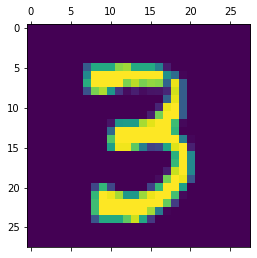

In [40]:
plt.matshow(X_test[20])